## **Mount implementation folder in google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/MyDrive/FYP/Implementation/data
encoded-data.csv	preprosessing-dos.csv	  UNSW-NB15_1.csv
NUSW-NB15_features.csv	selected_columns_all.csv  UNSW-NB15_2.csv
OTset.csv		SVR-predict-data.csv	  UNSW-NB15_3.csv
preprocessing.csv	testset.csv		  UNSW-NB15_4.csv


## **Load balanced training datset for DOS attacks**

Data = (x_train_DoS_normalized, y_train)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col['DoS'])

#create training dataset down sampling
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


DoS_attacks = df[df['DoS'] == 1]
Normal_Data = df[df['Label'] == 0]
frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=attack_labels, axis=1)
Y=result[['DoS']]
X.head()

undersample = RandomUnderSampler(random_state=0)
# fit and apply the transform
X, Y = undersample.fit_resample(X,Y)


x_train,y_train  = shuffle(X[columns],Y)


X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 




array([[0.00000000e+00, 4.50000018e-08, 1.90500008e-06, ...,
        0.00000000e+00, 0.00000000e+00, 7.50000030e-09],
       [0.00000000e+00, 6.00000000e-08, 2.54000000e-06, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e-08],
       [0.00000000e+00, 6.75000007e-08, 2.85750003e-06, ...,
        0.00000000e+00, 0.00000000e+00, 2.25000002e-08],
       ...,
       [0.00000000e+00, 3.97726546e-08, 3.97726546e-07, ...,
        5.50188389e-07, 1.93491976e-03, 3.04923685e-07],
       [0.00000000e+00, 2.21627718e-04, 9.38224007e-03, ...,
        0.00000000e+00, 0.00000000e+00, 7.38759060e-05],
       [8.13659397e-05, 1.40286103e-05, 8.69773838e-05, ...,
        3.59132424e-04, 9.31696124e-01, 5.61144412e-06]])

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [ ]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)

columns=list(select_col['DoS'])
col = ['dttl','state','sttl','proto','swin','ct_dst_sport_ltm','srcip', 'dstip','smeansz','sbytes','Sload','ct_state_ttl','dsport','sport','ct_dst_ltm']
test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 

DoS_attacks = test_data[test_data['attack_cat'] == 'DoS']
# print(DoS_attacks.shape)
Normal_Data = test_data[test_data['Label'] == 0]
# print(Normal_Data.shape)

frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=['attack_cat', 'Label'], axis=1)
Y=result[['Label']]
X.head()

x_test,y_test  = shuffle(X[col],Y)

x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
# print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
x_test['state'] = labelencoder.fit_transform(x_test['state'])

X_test_DoS_normalized = preprocessing.normalize(x_test) 


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Normalization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

# df=pd.read_csv('filtered-data.csv')
# X=df.drop(labels=['Label'], axis=1)
# # X=df.drop(labels=['attack_cat','Label'], axis=1)
# # Y=df[['attack_cat','Label']]
# Y=df[['Label']]

# # split the dataset
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 
# X_train_normalized = preprocessing.normalize(X_train)
# X_test_normalized = preprocessing.normalize(X_test)

array([[0.00000000e+00, 4.50000018e-08, 1.90500008e-06, ...,
        0.00000000e+00, 0.00000000e+00, 7.50000030e-09],
       [0.00000000e+00, 6.00000000e-08, 2.54000000e-06, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e-08],
       [0.00000000e+00, 6.75000007e-08, 2.85750003e-06, ...,
        0.00000000e+00, 0.00000000e+00, 2.25000002e-08],
       ...,
       [0.00000000e+00, 3.97726546e-08, 3.97726546e-07, ...,
        5.50188389e-07, 1.93491976e-03, 3.04923685e-07],
       [0.00000000e+00, 2.21627718e-04, 9.38224007e-03, ...,
        0.00000000e+00, 0.00000000e+00, 7.38759060e-05],
       [8.13659397e-05, 1.40286103e-05, 8.69773838e-05, ...,
        3.59132424e-04, 9.31696124e-01, 5.61144412e-06]])

# K nearest neighbours

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
min = 99999999.999
bestK = -1
for K in range(50):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    x = np.array(X_train_DoS_normalized)
    y = np.array(y_train)

    model.fit(x, y)  #fit the model
    pred=model.predict(X_test_DoS_normalized) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error, ',min = ',min,' bestk = ',bestK)
    if min > error:
        min = error
        bestK = K


RMSE value for k=  1 is: 0.22145513553053642 ,min =  99999999.999  bestk =  -1
RMSE value for k=  2 is: 0.19563209269795603 ,min =  0.22145513553053642  bestk =  1
RMSE value for k=  3 is: 0.1873769109324716 ,min =  0.19563209269795603  bestk =  2
RMSE value for k=  4 is: 0.18410917556282774 ,min =  0.1873769109324716  bestk =  3
RMSE value for k=  5 is: 0.18251976576419532 ,min =  0.18410917556282774  bestk =  4
RMSE value for k=  6 is: 0.1813788195442166 ,min =  0.18251976576419532  bestk =  5
RMSE value for k=  7 is: 0.1809298706016566 ,min =  0.1813788195442166  bestk =  6
RMSE value for k=  8 is: 0.18071353768430343 ,min =  0.1809298706016566  bestk =  7
RMSE value for k=  9 is: 0.1805398784748689 ,min =  0.18071353768430343  bestk =  8
RMSE value for k=  10 is: 0.18053664478212422 ,min =  0.1805398784748689  bestk =  9
RMSE value for k=  11 is: 0.18030691970907184 ,min =  0.18053664478212422  bestk =  10
RMSE value for k=  12 is: 0.18019552864521077 ,min =  0.18030691970907184  b

**Finding best K - test set**

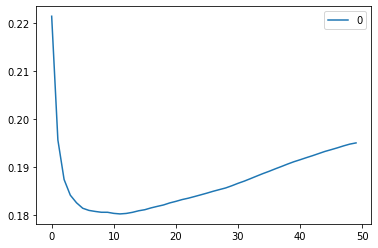

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
print('bestK = '+str(bestK))

bestK = 12


**Finding best K - train set**

In [ ]:
# from sklearn import neighbors
# from sklearn.metrics import mean_squared_error 
# from math import sqrt
# import matplotlib.pyplot as plt
# %matplotlib inline

# rmse_val = [] #to store rmse values for different k
# for K in range(50):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)
#     x = np.array(X_train_DoS_normalized)
#     y = np.array(y_train)

#     model.fit(x, y)  #fit the model
#     pred=model.predict(x) #make prediction on test set
#     error = sqrt(mean_squared_error(y,pred)) #calculate rmse
#     rmse_val.append(error) #store rmse values
#     print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
# curve = pd.DataFrame(rmse_val) #elbow curve 
# curve.plot()

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = bestK)
x = np.array(X_train_DoS_normalized)
y = np.array(y_train)
model.fit(x, y)
print(x.shape)
#predict on test set

x_test_array = np.array(X_test_DoS_normalized)
print(x_test_array.shape)
y_test_array = np.array(y_test)
y_pred_test_set = model.predict(x_test_array)

(19448, 15)
(446940, 15)


In [ ]:
from sklearn.metrics import accuracy_score

for i in range(1,100):
  y_predict_class = [1 if p > i/100 else 0 for p in y_pred_test_set]
  print("Accuracy when threshould = ",i/100, round(accuracy_score(y_test_array, y_predict_class), 6))

Accuracy when threshould =  0.01 0.775945
Accuracy when threshould =  0.02 0.775945
Accuracy when threshould =  0.03 0.775945
Accuracy when threshould =  0.04 0.775945
Accuracy when threshould =  0.05 0.775945
Accuracy when threshould =  0.06 0.775945
Accuracy when threshould =  0.07 0.775945
Accuracy when threshould =  0.08 0.775945
Accuracy when threshould =  0.09 0.842538
Accuracy when threshould =  0.1 0.842538
Accuracy when threshould =  0.11 0.842538
Accuracy when threshould =  0.12 0.842538
Accuracy when threshould =  0.13 0.842538
Accuracy when threshould =  0.14 0.842538
Accuracy when threshould =  0.15 0.842538
Accuracy when threshould =  0.16 0.842538
Accuracy when threshould =  0.17 0.884501
Accuracy when threshould =  0.18 0.884501
Accuracy when threshould =  0.19 0.884501
Accuracy when threshould =  0.2 0.884501
Accuracy when threshould =  0.21 0.884501
Accuracy when threshould =  0.22 0.884501
Accuracy when threshould =  0.23 0.884501
Accuracy when threshould =  0.24 0.8

In [ ]:
count =0
for i in y_pred_test_set:
  if i == 1:
    count += 1
count

3876

**confusion matrix**

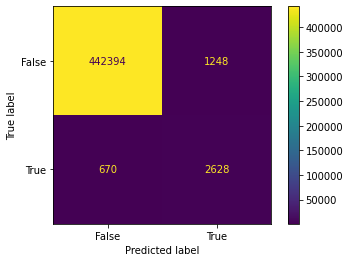

Accuracy when threshould =  0.99 0.995709


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

threshould =0.99

y_predict_class = [1 if p > threshould else 0 for p in y_pred_test_set]
confusion_matrix = metrics.confusion_matrix(y_test_array, y_predict_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 


print("Accuracy when threshould = ",threshould, round(accuracy_score(y_test_array, y_predict_class), 6))

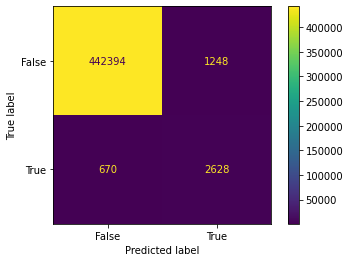

Accuracy when threshould =  1 0.995709


In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

threshould =1

y_predict_class = [1 if p >= threshould else 0 for p in y_pred_test_set]
confusion_matrix = metrics.confusion_matrix(y_test_array, y_predict_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 


print("Accuracy when threshould = ",threshould, round(accuracy_score(y_test_array, y_predict_class), 6))